In [1]:
%load_ext autoreload

%autoreload 2

from io import StringIO

import anndata
import pandas as pd
import numpy as np
import scanpy
import scanpy as sc

scanpy.settings.verbosity = 3
#sc.set_figure_params(dpi=200, dpi_save=300)
scanpy.logging.print_versions()
scanpy.set_figure_params(frameon=False, color_map='magma_r')

outdir = '/home/olga/googledrive/TabulaMicrocebus/data/cross-species'
! ls -lha $outdir

scanpy==1.4.6.dev9+ge632939 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.3 scipy==1.3.2 pandas==0.25.3 scikit-learn==0.22 statsmodels==0.10.2 python-igraph==0.7.1 louvain==0.6.1
total 41G
drwxrwxr-x 1 olga czb  4.0K Feb 13 11:27  .
drwxrwxr-x 1 olga czb  4.0K Dec  2 21:43  ..
drwxrwxr-x 1 olga czb  4.0K Mar 21 21:55  alltissues__10x__lemur__one2one_orthologs__csvs
-rw-r--r-- 1 olga czb  1.8G May 19 08:56  alltissues__10x__lemur__one2one_orthologs.h5ad
drwxrwxr-x 1 olga czb  4.0K Mar 21 16:51  alltissues__10x__mouse__one2one_orthologs__csvs
-rw-r--r-- 1 olga czb  2.5G May 19 08:54  alltissues__10x__mouse__one2one_orthologs.h5ad
drwxr-xr-x 1 olga czb  4.0K May 20 12:36  binarized
-r--r--r-- 1 olga czb   195 May 19 16:37 'binarized_expression__stable_genes__compartment_conserved (564988b6).desktop'
-rw-r--r-- 1 olga czb   77K May 19 08:00  binarized_expression__stable_genes__compartment_conserved.csv
-r--r--r-- 1 olga czb   195 May 19 08:18  binarized_expression__stable_genes__compartme

# Define outdirs

In [2]:
outdir_gdrive = '/home/olga/googledrive/TabulaMicrocebus/data/cross-species/within-species-de'
outdir_local = '/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species/within-species-de'
! mkdir $outdir_gdrive $outdir_local
outdirs = outdir_local, outdir_gdrive
!ls -lha $outdir_local

mkdir: cannot create directory ‘/home/olga/googledrive/TabulaMicrocebus/data/cross-species/within-species-de’: File exists
mkdir: cannot create directory ‘/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species/within-species-de’: File exists
total 2.1G
drwxr-xr-x  2 olga czb 4.0K May 24 08:52 .
drwxrwxr-x 13 olga czb 8.0K May 22 13:37 ..
-rw-r--r--  1 olga czb 553M May 22 15:58 lemur_lung__diffexpr_compartment_group.h5ad
-rw-r--r--  1 olga czb 307M May 24 08:52 mouse_lung__diffexpr_broad_group__defaults.h5ad
-rw-r--r--  1 olga czb 307M May 23 00:02 mouse_lung__diffexpr_broad_group.h5ad
-rw-r--r--  1 olga czb 307M May 24 08:43 mouse_lung__diffexpr_compartment_group__defaults.h5ad
-rw-r--r--  1 olga czb 307M May 24 08:49 mouse_lung__diffexpr_narrow_group__defaults.h5ad
-rw-r--r--  1 olga czb 307M May 24 08:33 mouse_lung_from_tabula-muris-senis__unified_compartments.h5ad


# Load into Scanpy

# Mouse Lemur raw counts

Created with this pull request: https://github.com/czbiohub/tabula-microcebus/pull/15

In [3]:
lemur_folder = '/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/10x'
! ls -lha $lemur_folder

total 50G
drwxrwxr-x 3 olga czb 4.0K May  7 15:51 .
drwxrwxr-x 7 olga czb 4.0K May  7 15:55 ..
drwxrwxr-x 4 olga czb  16K Feb 18 13:41 batches
-rw-rw-r-- 1 olga czb  15G May  6 11:55 tabula-microcebus--10x--counts--completely-unfiltered.h5ad
-rw-rw-r-- 1 olga czb 7.7G Mar  1 19:04 tabula-microcebus--10x--counts--min-100-genes-except-heart-min-50.h5ad
-rw-rw-r-- 1 olga czb 5.6G Mar  1 19:19 tabula-microcebus--10x--counts--min-100-genes-except-heart-min-50--min-1000-counts.h5ad
-rw-r--r-- 1 olga czb 6.8G May  7 05:46 tabula-microcebus--10x--counts--min-51-genes--min-101-counts.h5ad
-rw-r--r-- 1 olga czb 3.5G May 15 13:44 tabula-microcebus--10x--counts--min-51-genes--min-101-counts--trnas-summed.h5ad
-rw-r--r-- 1 olga czb 2.4G May  6 17:40 tabula-microcebus--10x--counts--min-51-genes--min-101-counts--trnas-summed--no-duplicate-barcodes.h5ad
-rw-r--r-- 1 olga czb 3.1G May 15 14:15 tabula-microcebus--10x--counts--min-51-genes--min-101-counts--trnas-summed--no-duplicate-barcodes--pairs-disam

## Read all raw count data

In [4]:
%%time

h5ad = f'{lemur_folder}/tabula-microcebus--10x--counts--min-51-genes--min-101-counts--trnas-summed.h5ad'
lemur = scanpy.read(h5ad, cache=True)
lemur

CPU times: user 1.21 s, sys: 2.67 s, total: 3.89 s
Wall time: 12.8 s


AnnData object with n_obs × n_vars = 756489 × 31509 
    obs: 'batch', 'channel', 'individual', 'method', 'original_channel', 'channel_no_10x', 'sequencing_run', 'free_annotation', 'tissue', 'cell_ontology_class', 'cell_ontology_id', 'compartment', 'compartment_id', 'n_genes', 'n_counts'
    var: 'gene_ids'

## Subset to lung

In [5]:
lemur_lung = lemur[lemur.obs.tissue == "Lung"]
lemur_lung

View of AnnData object with n_obs × n_vars = 104167 × 31509 
    obs: 'batch', 'channel', 'individual', 'method', 'original_channel', 'channel_no_10x', 'sequencing_run', 'free_annotation', 'tissue', 'cell_ontology_class', 'cell_ontology_id', 'compartment', 'compartment_id', 'n_genes', 'n_counts'
    var: 'gene_ids'

### Look at lemur lung.obs.head()

In [6]:
lemur_lung.obs.head()

,batch,channel,individual,method,original_channel,channel_no_10x,sequencing_run,free_annotation,tissue,cell_ontology_class,cell_ontology_id,compartment,compartment_id,n_genes,n_counts
index,,,,,,,,,,,,,,,
Antoine_Lung_CD31_10X_AAACCTGAGAAACGAG,individual=Antoine__tissue=Lung__old_channel=A...,Antoine_Lung_CD31_10X,Antoine,10x,Antoine_Lung_CD31pos,ANTOINE_LUNG_CD3,180917_A00111_0212_BHGMF5DMXX,macrophages (MARCO+ SDC2+),Lung,macrophage,CL:0000235,myeloid,CL:0000766,2849,11156
Antoine_Lung_CD31_10X_AAACCTGAGAAGGTGA,individual=Antoine__tissue=Lung__old_channel=A...,Antoine_Lung_CD31_10X,Antoine,10x,Antoine_Lung_CD31pos,ANTOINE_LUNG_CD3,180917_A00111_0212_BHGMF5DMXX,nan,Lung,nan,nan,nan,nan,102,126
Antoine_Lung_CD31_10X_AAACCTGAGACACGAC,individual=Antoine__tissue=Lung__old_channel=A...,Antoine_Lung_CD31_10X,Antoine,10x,Antoine_Lung_CD31pos,ANTOINE_LUNG_CD3,180917_A00111_0212_BHGMF5DMXX,nan,Lung,nan,nan,nan,nan,111,137
Antoine_Lung_CD31_10X_AAACCTGAGAGTCGGT,individual=Antoine__tissue=Lung__old_channel=A...,Antoine_Lung_CD31_10X,Antoine,10x,Antoine_Lung_CD31pos,ANTOINE_LUNG_CD3,180917_A00111_0212_BHGMF5DMXX,nan,Lung,nan,nan,nan,nan,138,178
Antoine_Lung_CD31_10X_AAACCTGAGATCTGCT,individual=Antoine__tissue=Lung__old_channel=A...,Antoine_Lung_CD31_10X,Antoine,10x,Antoine_Lung_CD31pos,ANTOINE_LUNG_CD3,180917_A00111_0212_BHGMF5DMXX,nan,Lung,nan,nan,nan,nan,96,112


## Read all species object with unified compartments

In [7]:
%%time
h5ad = f'{outdir}/concatenated__human-lung--lemur-lung--mouse-lung__10x__one2one_orthologs__unified_compartments.h5ad'
adata = scanpy.read_h5ad(h5ad)
adata

CPU times: user 687 ms, sys: 1.13 s, total: 1.82 s
Wall time: 22 s


AnnData object with n_obs × n_vars = 118089 × 11970 
    obs: 'age', 'batch', 'cell', 'cell_barcode', 'cell_ontology_class', 'cell_ontology_id', 'channel', 'channel_no_10x', 'channel_tissue', 'compartment', 'compartment_id', 'free_annotation', 'individual', 'location', 'magnetic.selection', 'method', 'mouse.id', 'nGene', 'nUMI', 'n_barcodes', 'n_counts', 'n_genes', 'orig.ident', 'original_channel', 'patient', 'percent.ribo', 'possibly_contaminated_barcode', 'preparation.site', 'region', 'sample', 'sequencing_run', 'sex', 'species', 'species_batch', 'species_latin', 'subtissue', 'tissue', 'tissue_free_annotation', 'compartment_updated_from_human', 'compartment_updated_from_human__with_species', 'compartment_updated_from_lemur', 'compartment_updated_from_lemur__with_species', 'narrow_group', 'broad_group', 'compartment_group'
    var: 'mouse_lemur__gene_name', 'mouse_lemur_to_human__homology_type', 'human_to_mouse__homology_type', 'mouse__gene_name', 'gene_ids-lemur', 'n_cells-mouse'

### Look at adata.obs.head()

In [8]:
adata.obs.head()

,age,batch,cell,cell_barcode,cell_ontology_class,cell_ontology_id,channel,channel_no_10x,channel_tissue,compartment,...,subtissue,tissue,tissue_free_annotation,compartment_updated_from_human,compartment_updated_from_human__with_species,compartment_updated_from_lemur,compartment_updated_from_lemur__with_species,narrow_group,broad_group,compartment_group
P2_1_AAACCTGAGAAACCAT-human,NaN,NaN,NaN,AAACCTGAGAAACCAT,capillary endothelial cell,NaN,P2_1,NaN,NaN,endothelial,...,NaN,Lung,NaN,endothelial,endothelial (Human),endothelial,endothelial (Human),Capillary Aerocyte,Capillary,endothelial
P2_1_AAATGCCAGATGAGAG-human,NaN,NaN,NaN,AAATGCCAGATGAGAG,capillary endothelial cell,NaN,P2_1,NaN,NaN,endothelial,...,NaN,Lung,NaN,endothelial,endothelial (Human),endothelial,endothelial (Human),Capillary Aerocyte,Capillary,endothelial
P2_1_AACACGTTCGATCCCT-human,NaN,NaN,NaN,AACACGTTCGATCCCT,capillary endothelial cell,NaN,P2_1,NaN,NaN,endothelial,...,NaN,Lung,NaN,endothelial,endothelial (Human),endothelial,endothelial (Human),Capillary Aerocyte,Capillary,endothelial
P2_1_AACACGTTCGCACTCT-human,NaN,NaN,NaN,AACACGTTCGCACTCT,capillary endothelial cell,NaN,P2_1,NaN,NaN,endothelial,...,NaN,Lung,NaN,endothelial,endothelial (Human),endothelial,endothelial (Human),Capillary Aerocyte,Capillary,endothelial
P2_1_AACCATGCAGCTCGCA-human,NaN,NaN,NaN,AACCATGCAGCTCGCA,capillary endothelial cell,NaN,P2_1,NaN,NaN,endothelial,...,NaN,Lung,NaN,endothelial,endothelial (Human),endothelial,endothelial (Human),Capillary Aerocyte,Capillary,endothelial


### Remove "-lemur" from combined annotations

In [9]:
lemur_obs_from_concatenated = adata.obs.query('species_batch == "lemur"')
lemur_obs_from_concatenated.index = lemur_obs_from_concatenated.index.str.split('-lemur').str[0]
lemur_obs_from_concatenated.head()

,age,batch,cell,cell_barcode,cell_ontology_class,cell_ontology_id,channel,channel_no_10x,channel_tissue,compartment,...,subtissue,tissue,tissue_free_annotation,compartment_updated_from_human,compartment_updated_from_human__with_species,compartment_updated_from_lemur,compartment_updated_from_lemur__with_species,narrow_group,broad_group,compartment_group
Antoine_Lung_CD31_10X_AAACCTGAGAAACGAG,NaN,individual=Antoine__tissue=Lung__old_channel=A...,NaN,AAACCTGAGAAACGAG,macrophage,CL:0000235,Antoine_Lung_CD31_10X,ANTOINE_LUNG_CD3,NaN,myeloid,...,NaN,Lung,NaN,myeloid,myeloid (Mouse lemur),myeloid,myeloid (Mouse lemur),Macrophage,Macrophage,myeloid
Antoine_Lung_CD31_10X_AAACCTGAGATGTTAG,NaN,individual=Antoine__tissue=Lung__old_channel=A...,NaN,AAACCTGAGATGTTAG,NaN,NaN,Antoine_Lung_CD31_10X,ANTOINE_LUNG_CD3,NaN,NaN,...,NaN,Lung,NaN,nan,nan (Mouse lemur),nan,nan (Mouse lemur),Doublet,Doublet,nan
Antoine_Lung_CD31_10X_AAACCTGAGCGTAGTG,NaN,individual=Antoine__tissue=Lung__old_channel=A...,NaN,AAACCTGAGCGTAGTG,endothelial cell of artery,CL:1000413,Antoine_Lung_CD31_10X,ANTOINE_LUNG_CD3,NaN,endothelial,...,NaN,Lung,NaN,endothelial,endothelial (Mouse lemur),endothelial,endothelial (Mouse lemur),Artery,Artery,endothelial
Antoine_Lung_CD31_10X_AAACCTGAGGCAGTCA,NaN,individual=Antoine__tissue=Lung__old_channel=A...,NaN,AAACCTGAGGCAGTCA,type II pneumocyte,CL:0002063,Antoine_Lung_CD31_10X,ANTOINE_LUNG_CD3,NaN,epithelial,...,NaN,Lung,NaN,epithelial,epithelial (Mouse lemur),epithelial,epithelial (Mouse lemur),Alveolar Epithelial Type 2,Alveolar Epithelial Type 2,epithelial
Antoine_Lung_CD31_10X_AAACCTGAGGGTGTGT,NaN,individual=Antoine__tissue=Lung__old_channel=A...,NaN,AAACCTGAGGGTGTGT,macrophage,CL:0000235,Antoine_Lung_CD31_10X,ANTOINE_LUNG_CD3,NaN,myeloid,...,NaN,Lung,NaN,myeloid,myeloid (Mouse lemur),myeloid,myeloid (Mouse lemur),Proliferating Macrophage,Macrophage,myeloid


## Add unified compartments

In [10]:
unified_cols = ['narrow_group', 'broad_group', 'compartment_group']

In [19]:
obs_with_compartments = lemur_lung.obs.join(lemur_obs_from_concatenated[unified_cols].astype(str))
obs_with_compartments.head()

,batch,channel,individual,method,original_channel,channel_no_10x,sequencing_run,free_annotation,tissue,cell_ontology_class,cell_ontology_id,compartment,compartment_id,n_genes,n_counts,narrow_group,broad_group,compartment_group
index,,,,,,,,,,,,,,,,,,
Antoine_Lung_CD31_10X_AAACCTGAGAAACGAG,individual=Antoine__tissue=Lung__old_channel=A...,Antoine_Lung_CD31_10X,Antoine,10x,Antoine_Lung_CD31pos,ANTOINE_LUNG_CD3,180917_A00111_0212_BHGMF5DMXX,macrophages (MARCO+ SDC2+),Lung,macrophage,CL:0000235,myeloid,CL:0000766,2849,11156,Macrophage,Macrophage,myeloid
Antoine_Lung_CD31_10X_AAACCTGAGAAGGTGA,individual=Antoine__tissue=Lung__old_channel=A...,Antoine_Lung_CD31_10X,Antoine,10x,Antoine_Lung_CD31pos,ANTOINE_LUNG_CD3,180917_A00111_0212_BHGMF5DMXX,nan,Lung,nan,nan,nan,nan,102,126,NaN,NaN,NaN
Antoine_Lung_CD31_10X_AAACCTGAGACACGAC,individual=Antoine__tissue=Lung__old_channel=A...,Antoine_Lung_CD31_10X,Antoine,10x,Antoine_Lung_CD31pos,ANTOINE_LUNG_CD3,180917_A00111_0212_BHGMF5DMXX,nan,Lung,nan,nan,nan,nan,111,137,NaN,NaN,NaN
Antoine_Lung_CD31_10X_AAACCTGAGAGTCGGT,individual=Antoine__tissue=Lung__old_channel=A...,Antoine_Lung_CD31_10X,Antoine,10x,Antoine_Lung_CD31pos,ANTOINE_LUNG_CD3,180917_A00111_0212_BHGMF5DMXX,nan,Lung,nan,nan,nan,nan,138,178,NaN,NaN,NaN
Antoine_Lung_CD31_10X_AAACCTGAGATCTGCT,individual=Antoine__tissue=Lung__old_channel=A...,Antoine_Lung_CD31_10X,Antoine,10x,Antoine_Lung_CD31pos,ANTOINE_LUNG_CD3,180917_A00111_0212_BHGMF5DMXX,nan,Lung,nan,nan,nan,nan,96,112,NaN,NaN,NaN


In [20]:
obs_with_compartments[unified_cols].notnull().sum()

narrow_group         36934
broad_group          36934
compartment_group    36934
dtype: int64

In [27]:
obs_with_compartments['narrow_group'].value_counts()

nan                                       67233
Neutrophil                                 6589
Macrophage                                 6466
Natural Killer                             3578
Unknown Epithelial                         2824
Monocyte                                   2644
CD4+ CD8+ T                                1864
CD4+ T                                     1818
Doublet                                    1283
Capillary                                  1211
Uknown Endothelial                         1140
Capillary Aerocyte                          877
Alveolar Fibroblast                         809
Alveolar Epithelial Type 2                  804
Proliferating Macrophage                    455
Natural Killer T cell                       446
Proliferating NK/T                          434
CD8+ T                                      423
Adventitial Fibroblast                      417
B cell                                      358
Lymphatic                               

## Make `lemur_lung_new_obs` with compartment groups and cleaned up narrow groups

In [30]:
lemur_lung_new_obs = lemur_lung.copy()
lemur_lung_new_obs.obs = obs_with_compartments
lemur_lung_new_obs = lemur_lung_new_obs[lemur_lung_new_obs.obs.groupby('narrow_group').filter(lambda x: len(x) >= 3).index]
lemur_lung_new_obs = lemur_lung_new_obs[lemur_lung_new_obs.obs.query('narrow_group != "nan"').index]
lemur_lung_new_obs

View of AnnData object with n_obs × n_vars = 36933 × 31509 
    obs: 'batch', 'channel', 'individual', 'method', 'original_channel', 'channel_no_10x', 'sequencing_run', 'free_annotation', 'tissue', 'cell_ontology_class', 'cell_ontology_id', 'compartment', 'compartment_id', 'n_genes', 'n_counts', 'narrow_group', 'broad_group', 'compartment_group'
    var: 'gene_ids'

## Write newly created object to file

In [35]:
for d in outdirs:
    h5ad = f'{d}/lemur_lung_from_tabula-microcebus__unified_compartments.h5ad'
    print(h5ad)
    lemur_lung_new_obs.write(h5ad)

/home/olga/data_lg/data_sm_copy/tabula-microcebus/data-objects/cross-species/within-species-de/lemur_lung_from_tabula-microcebus__unified_compartments.h5ad
/home/olga/googledrive/TabulaMicrocebus/data/cross-species/within-species-de/lemur_lung_from_tabula-microcebus__unified_compartments.h5ad


# do differential expression


In [36]:
import diffexpr

In [37]:
prefix = 'lemur_lung'

## narrow group

In [38]:
%%time

group = 'narrow_group'
sc.tl.rank_genes_groups(lemur_lung_new_obs, group)

for d in outdirs:
    h5ad = f"{d}/{prefix}__diffexpr_{group}__defaults.h5ad"
    lemur_lung_new_obs.write(h5ad)

# mouse_lung_new_obs.uns['rank_genes_groups']

# sc.pl.rank_genes_groups(mouse_lung_new_obs, sharey=False)


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:03:21)
CPU times: user 24.6 s, sys: 2min 55s, total: 3min 19s
Wall time: 3min 38s


## broad group

In [39]:
%%time

group = 'broad_group'
sc.tl.rank_genes_groups(lemur_lung_new_obs, group)

for d in outdirs:
    h5ad = f"{d}/{prefix}__diffexpr_{group}__defaults.h5ad"
    lemur_lung_new_obs.write(h5ad)

# mouse_lung_new_obs.uns['rank_genes_groups']

# sc.pl.rank_genes_groups(mouse_lung_new_obs, sharey=False)


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:18)
CPU times: user 17.6 s, sys: 2.28 s, total: 19.8 s
Wall time: 38.2 s


## compartment group

In [40]:
%%time

group = 'compartment_group'
sc.tl.rank_genes_groups(lemur_lung_new_obs, group)

for d in outdirs:
    h5ad = f"{d}/{prefix}__diffexpr_{group}__defaults.h5ad"
    lemur_lung_new_obs.write(h5ad)

# mouse_lung_new_obs.uns['rank_genes_groups']

# sc.pl.rank_genes_groups(mouse_lung_new_obs, sharey=False)


ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)
CPU times: user 5.06 s, sys: 1.19 s, total: 6.25 s
Wall time: 28.3 s


# Logistic regression

## compartment group

In [ ]:
%%time

group = 'compartment_group'
sc.tl.rank_genes_groups(lemur_lung_new_obs, group)
# diffexpr.do_differential_expression(mouse_lung_new_obs, group, n_jobs=16)

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
 (0:55:11)


/home/olga/miniconda3/envs/tabula-microcebus-v2/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


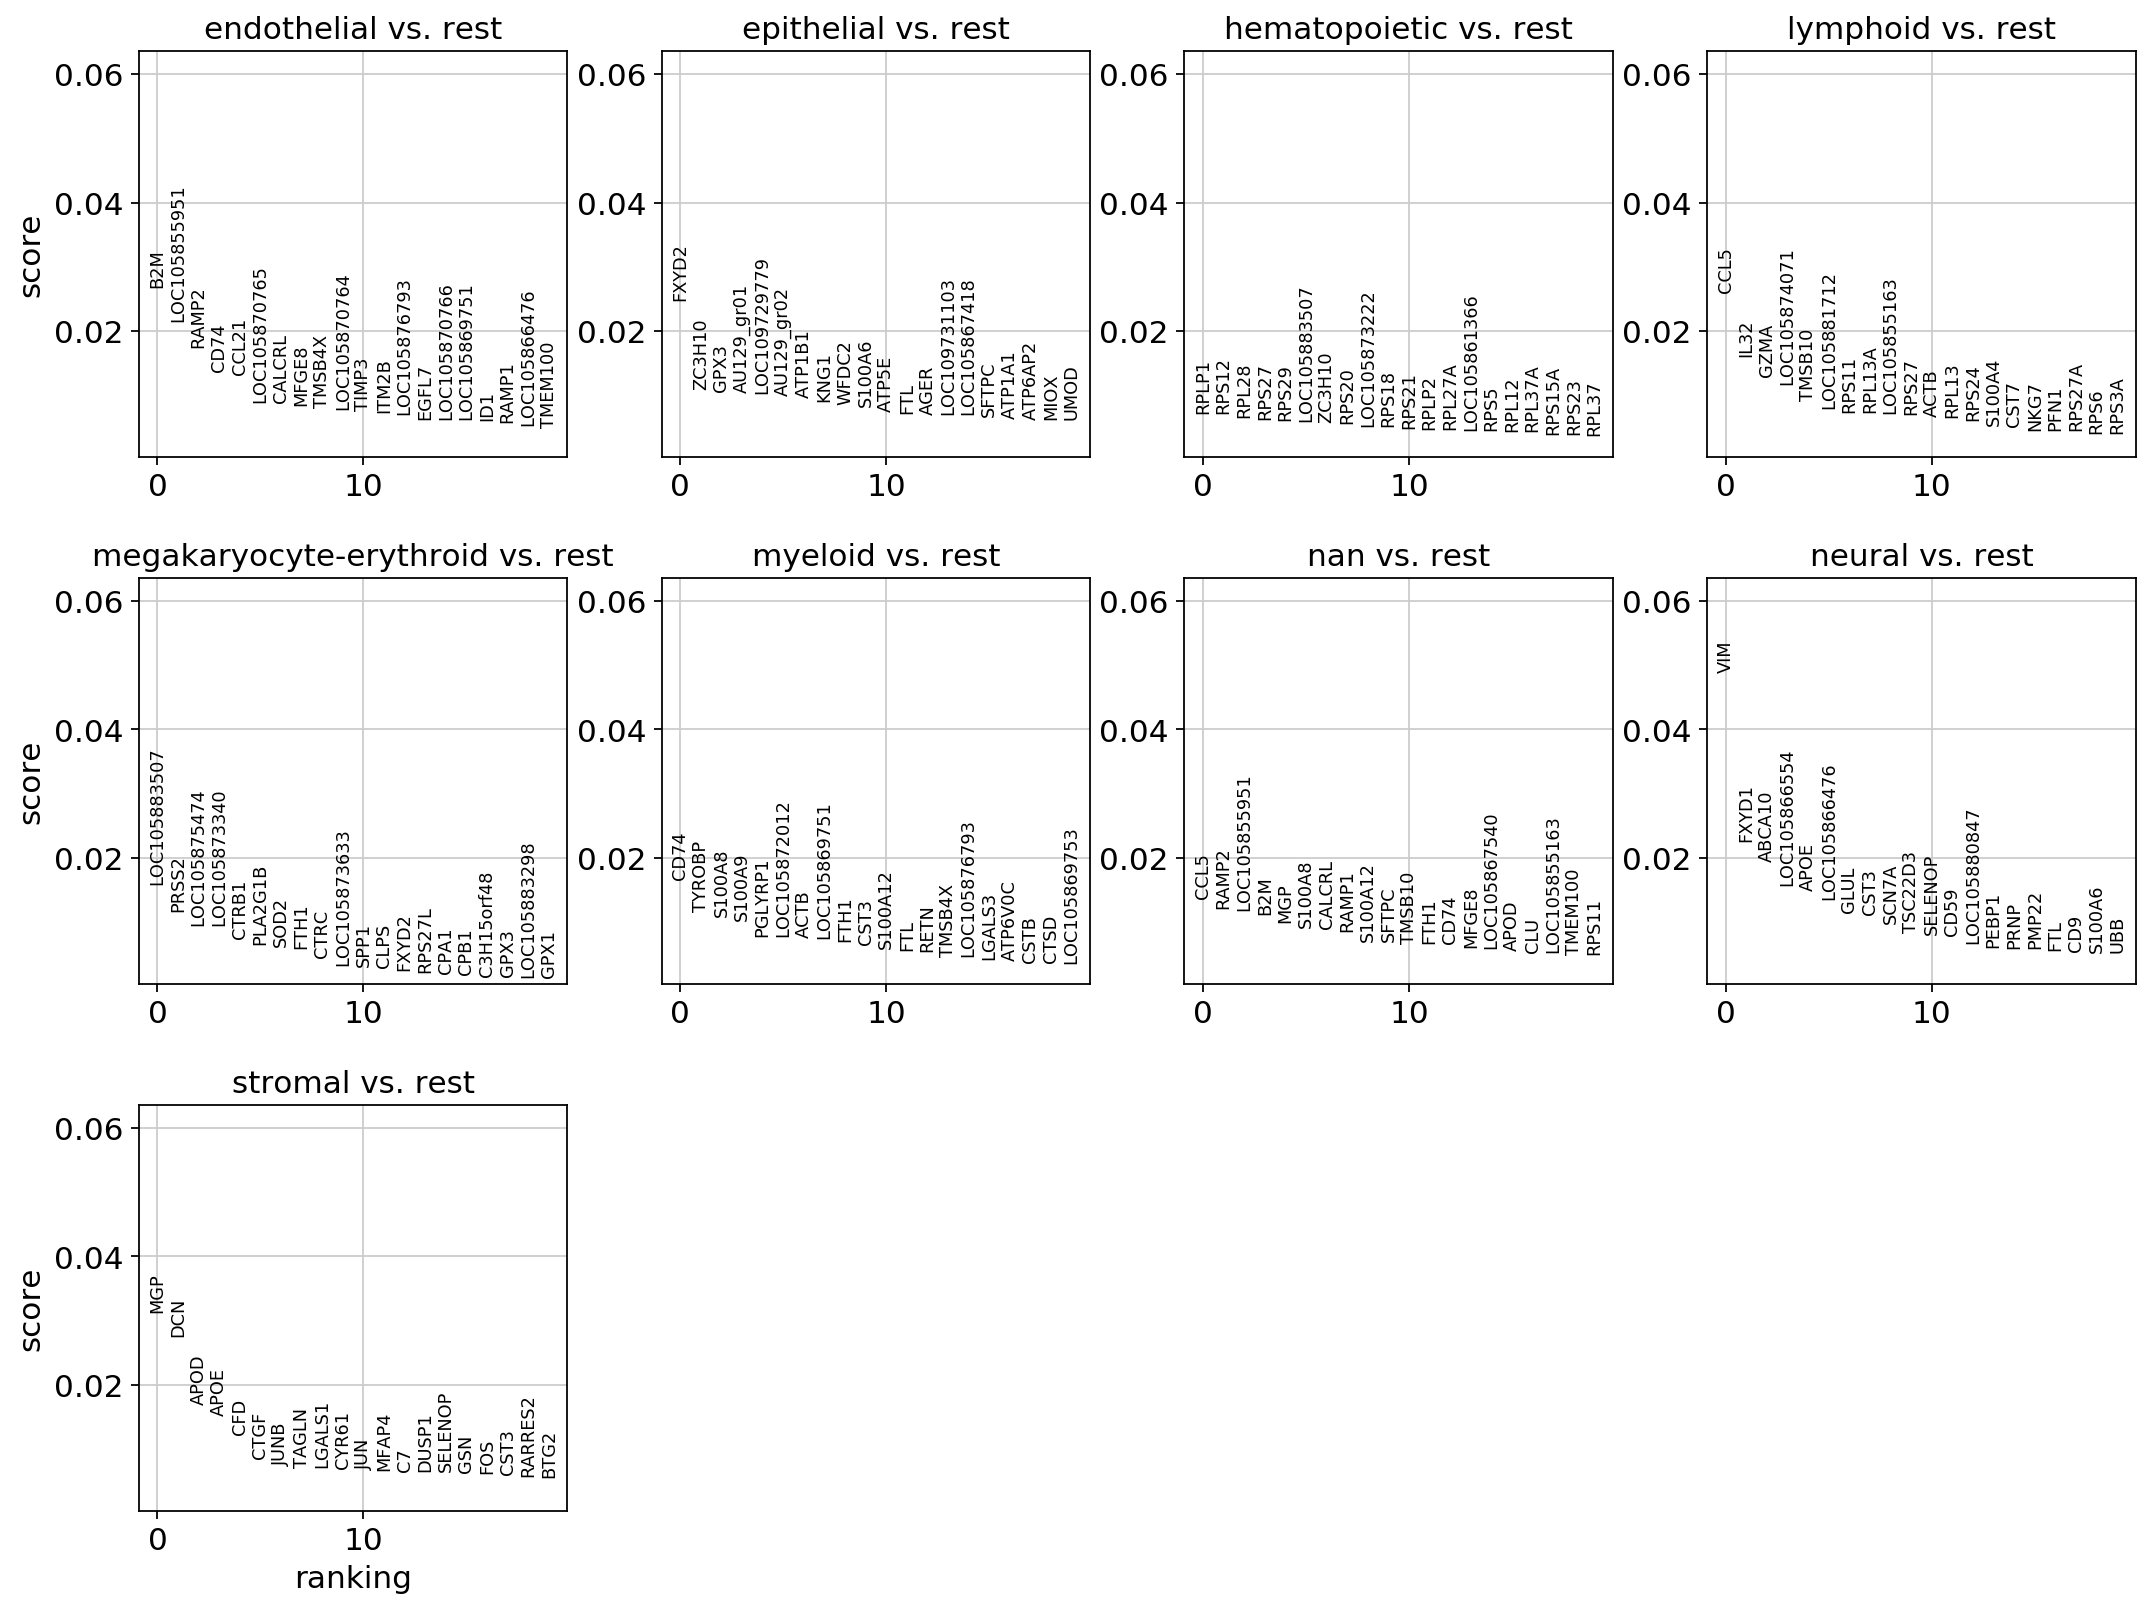

In [16]:
group = 'compartment_group'

diffexpr.do_differential_expression(lemur_lung_new_obs, group)

### Write results to file

In [17]:
for d in outdirs:
    h5ad = f"{d}/{prefix}__diffexpr_{group}.h5ad"
    lemur_lung_new_obs.write(h5ad)
#     mouse_lung_new_obs.write_csvs(f'{prefix}__diffexpr__{group}')

## Broad group

In [ ]:
group = 'broad_group'

diffexpr.do_differential_expression(lemur_lung_new_obs, group, n_jobs=16)

ranking genes


In [ ]:
lemur_lung_new_obs.uns['rank_genes_groups']

### Write results to file

In [ ]:
for d in outdirs:
    h5ad = f"{d}/{prefix}__diffexpr_{group}.h5ad"
    lemur_lung_new_obs.write(h5ad)
#     lemur_lung_new_obs.write_csvs(f'{prefix}__diffexpr__{group}')

## narrow group

In [ ]:
group = 'narrow_group'
diffexpr.do_differential_expression(lemur_lung_new_obs, group) 

### Write results to file

In [ ]:
for d in outdirs:
    h5ad = f"{d}/{prefix}__diffexpr_{group}.h5ad"
    lemur_lung_new_obs.write(h5ad)
#     lemur_lung_new_obs.write_csvs(f'{prefix}__diffexpr__{group}')